In [1]:
import scanpy as sc
from harmony import harmonize

In [2]:
adata = sc.read('/lustre/scratch126/cellgen/team292/ha10/data/Heart_Atlas/adata_Heart_Reichart_HV_train.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 284727 × 5000
    obs: 'Sample', 'donor_id', 'Region_x', 'Primary.Genetic.Diagnosis', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_z', 'scrublet_score_log', 'solo_score', 'cell_states', 'Assigned', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'sex_ontology_term_id', 'assay_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'disease_renamed'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'ENS'
    uns: 'Primary.Genetic.Diagnosis_colors', 'Region_x_colors', 'cell_states_colors', 'cell_type_colors', 'cell_type_ontology_term_id_colors', 'diseas

In [4]:
sc.tl.pca(adata, n_comps=25)

In [5]:
adata.obsm["X_harmony"] = harmonize(adata.obsm["X_pca"], adata.obs, batch_key='donor_id')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


In [6]:
adata

AnnData object with n_obs × n_vars = 284727 × 5000
    obs: 'Sample', 'donor_id', 'Region_x', 'Primary.Genetic.Diagnosis', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_z', 'scrublet_score_log', 'solo_score', 'cell_states', 'Assigned', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'sex_ontology_term_id', 'assay_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'disease_renamed'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'ENS'
    uns: 'Primary.Genetic.Diagnosis_colors', 'Region_x_colors', 'cell_states_colors', 'cell_type_colors', 'cell_type_ontology_term_id_colors', 'diseas

In [7]:
adata.write('/lustre/scratch127/cellgen/cellgeni/tickets/tic-3135/objs_heart/adata_harmony_updated_notfinal.h5ad', compression='gzip')

In [1]:
import scanpy as sc

In [2]:
adata = sc.read('/lustre/scratch127/cellgen/cellgeni/tickets/tic-3135/adata_harmony_noumap.h5ad')

/software/cellgen/team278/bc8/envs/harmony/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
sc.tl.umap(adata)

/software/cellgen/team278/bc8/envs/harmony/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
adata

AnnData object with n_obs × n_vars = 33214 × 5000
    obs: 'Sample', 'donor_id', 'Region_x', 'Primary.Genetic.Diagnosis', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'scrublet_score_z', 'scrublet_score_log', 'solo_score', 'cell_states', 'Assigned', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'sex_ontology_term_id', 'assay_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'disease_renamed', 'SEACell'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'ENS'
    uns: 'Primary.Genetic.Diagnosis_colors', 'Region_x_colors', 'cell_states_colors', 'cell_type_colors', 'cell_type_ontology_term_id_colors

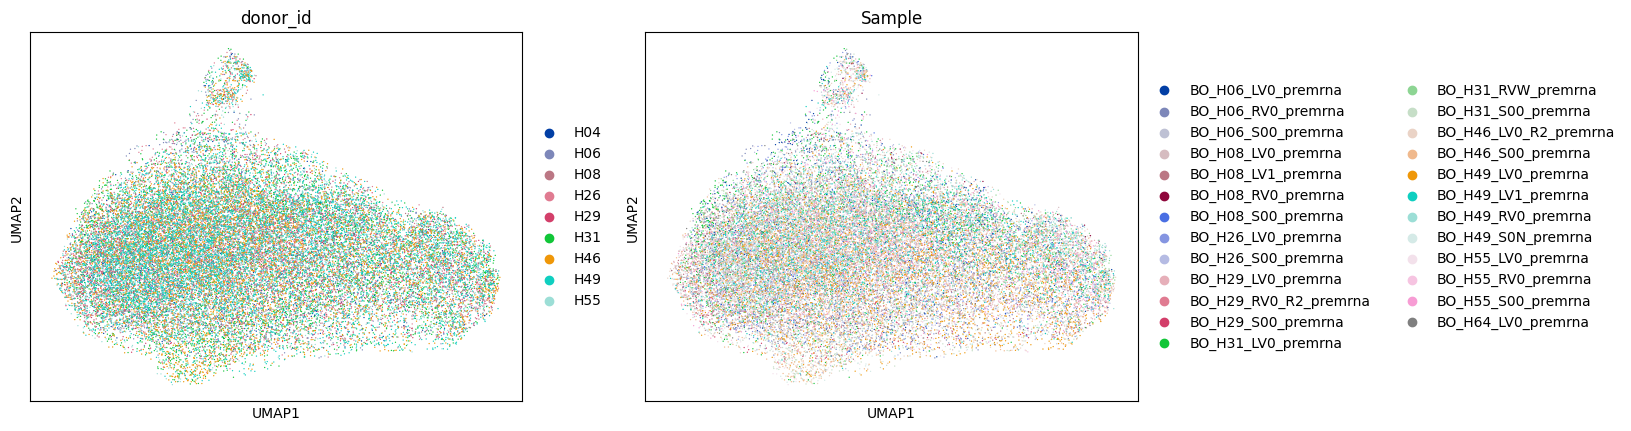

In [5]:
sc.pl.umap(adata, color=['donor_id','Sample'])

In [7]:
adata.write('/lustre/scratch127/cellgen/cellgeni/tickets/tic-3135/adata_harmony.h5ad', compression='gzip')